In [1]:
#%reload 2
import matplotlib.pyplot as plt
import quandl
import pandas as pd
import os

In [2]:
quandl.ApiConfig.api_key = "_epxy8PNMMrBFS5JL4_B"

In [3]:
GAS_STATIONS_PATH = os.path.join('..', 'data', 'raw', 'input_data', 'Eingabedaten', 'Tankstellen.csv')
GAS_PRICE_PATH = os.path.join('..', 'data', 'raw', 'input_data', 'Eingabedaten', 'Benzinpreise')

In [4]:
start_date="2014-6-8"
end_date="2017-9-21"

In [5]:
gas_stations_df = pd.read_csv(GAS_STATIONS_PATH, sep=';', names=['id', 'Name', 'Company', 'Street', 'House_Number', 'Postalcode', 'City', 'Lat', 'Long'],index_col='id')
gas_stations_df

,Name,Company,Street,House_Number,Postalcode,City,Lat,Long
id,,,,,,,,
1,star Tankstelle,STAR,Listlandstrasse,16,25992,List,55.015890,8.429530
2,Esso Tankstelle,ESSO,TRIFT 2,,25980,WESTERLAND,54.907468,8.308741
3,"SYLT, TRIFT",Shell,TRIFT 7,NaN,25980,SYLT,54.904400,8.310700
4,DEXX-Station 188,DEXX,Dorfstr.,19,25927,Aventoft,54.901300,8.822810
5,team Tankautomat Hesbüll,Raiffeisen,Raiffeisenstr.,1,25927,Hesbüll,54.900900,8.810690
6,Aral Tankstelle,ARAL,Keitumer Landstraße,NaN,25980,Sylt-Ost,54.900402,8.339205
7,team Tankautomat Süderlügum,team,Hauptstr.,16,25923,Süderlügum,54.870800,8.906840
8,ELAN Suederluegum,ELAN,HAUPTSTR.,4,25923,SUEDERLUEGUM,54.869200,8.906220
9,OIL! tank & go Automatentankstelle Ladelund,OIL!,Dorfstraße 24,NaN,25926,Ladelund,54.840400,9.027780


In [6]:
gas_station_id = 19

In [7]:
gas_station = pd.read_csv(os.path.join(GAS_PRICE_PATH,'{}.csv'.format(gas_station_id)), names=['Timestamp', 'Price'],  index_col='Timestamp',parse_dates=['Timestamp'],sep=';')
gas_station_resampled = gas_station.resample('1T').bfill()

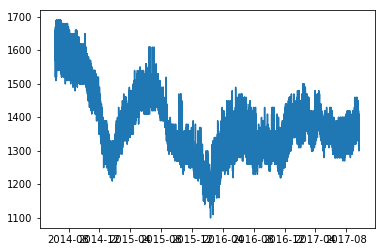

In [8]:
plt.plot(gas_station)
plt.show()

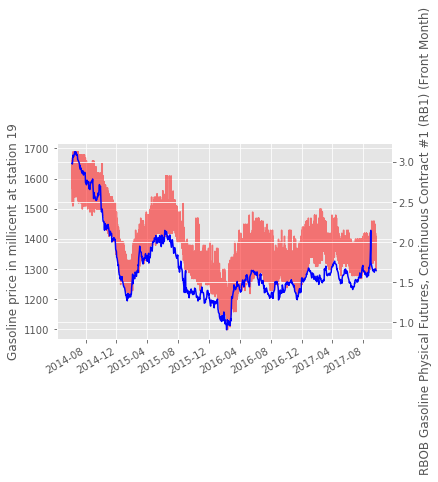

0.887506315349


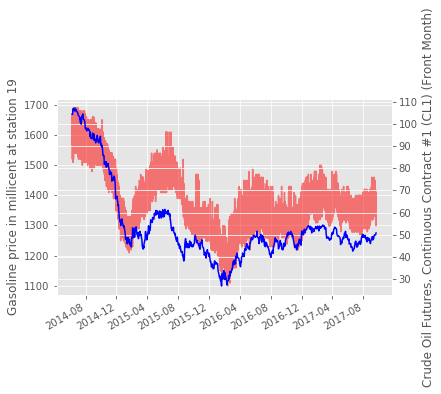

0.839716420034


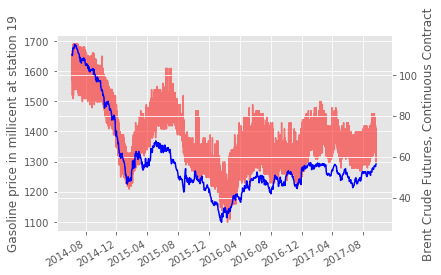

0.854785701154


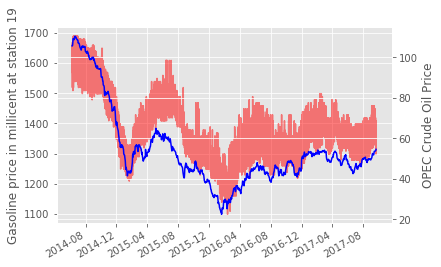

0.86124928059


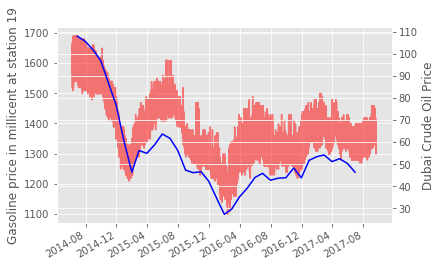

0.849549827431


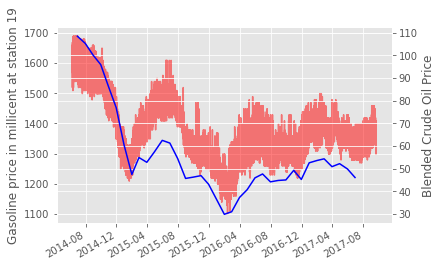

0.838734278561


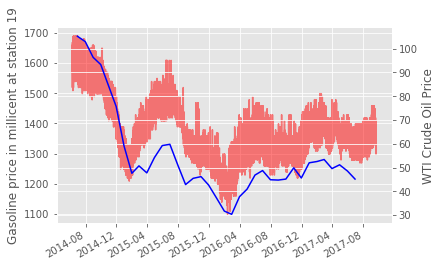

0.822428086318


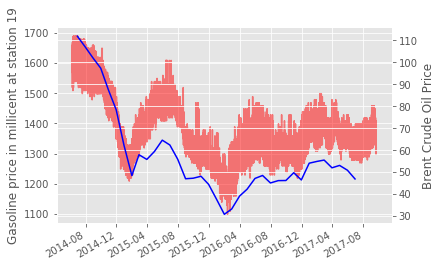

0.838682218792


In [17]:
# Full list: https://blog.quandl.com/api-for-commodity-data
# Oil and gasoline prices are relevant for our task
for exchange, selector  in [("CHRIS/CME_RB1", 'Last'), ("CHRIS/CME_CL1", 'Last'), ("CHRIS/ICE_B1", 'Settle'), ("OPEC/ORB", 10), ("ODA/POILDUB_USD", 10), ("ODA/POILAPSP_USD", 10), ("ODA/POILWTI_USD", 10), ("ODA/POILBRE_USD", 10)]:
    dataset = quandl.Dataset(exchange)
    mydata = quandl.get(exchange, start_date=start_date, end_date=end_date)
    
    fig, ax1 = plt.subplots()

    ax1.plot(gas_station, 'r', alpha=0.5)
    ax1.set_ylabel('Gasoline price in millicent at station ' + str(gas_station_id))
    
    ax2 = ax1.twinx()
    if 'CHRIS' in exchange:
        ax2.plot(mydata[selector], 'b')
    else:    
        ax2.plot(mydata, 'b')
    ax2.set_ylabel(dataset.name)
    
    fig.autofmt_xdate()
    if "ODA/POILBRE_USD" in exchange:
        plt.savefig("comparison-gas-and-oil-price.png", dpi=700)
    plt.show()
    
    exchange_data = mydata.resample('1T').mean().bfill()
    combined = exchange_data.merge(gas_station_resampled, left_index=True, right_index=True)
    correlation = combined.corr()['Price'][0]
    print(correlation)

In [10]:
dataset.name

'Brent Crude Oil Price'

In [11]:
dataset.description

'Crude Oil (petroleum),  Dated Brent, light blend 38 API, fob U.K., US$ per barrel.  Units: US Dollars per Barrel.  Note:  This data is sourced from www.opendataforafrica.org/IMFPCP2014Jan where it is offered under an open data licence (www.opendataforafrica.org/legal/termsofuse).'